<a href="https://colab.research.google.com/gist/SoKawai1/4c28e26b6ab595e01a9ee9c0dc8570b1/anime_faces_classification_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from google.colab import files, drive
import pandas as pd
import cv2
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns

Загрузка токена kaggle для импорта ds

In [ ]:
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kutmanbekamatov","key":"9a015e399328403541b3b75819fc4cfd"}'}

In [ ]:
path = kagglehub.dataset_download("mertkkl/manga-facial-expressions")

print(path)

/root/.cache/kagglehub/datasets/mertkkl/manga-facial-expressions/versions/1


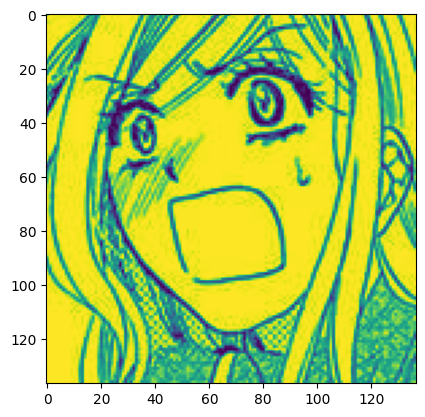

In [ ]:
first_image_path = os.path.join(path, "angry", "022_914_584_148_148.png")
img = cv2.imread(first_image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
plt.show()

In [ ]:
images = []
labels = []


for face_expression_image in os.listdir(path):
    face_expression_folder = os.path.join(path, face_expression_image)
    if os.path.isdir(face_expression_folder):
        for img_file in os.listdir(face_expression_folder):
            if img_file.endswith(".jpg") or img_file.endswith(".png"):
                img_path = os.path.join(face_expression_folder, img_file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (128, 128))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                images.append(img)
                labels.append(face_expression_image)

images_array = np.array(images)
labels_array = np.array(labels)

In [ ]:
images_array.shape

(455, 128, 128)

In [ ]:
labels_array.shape

(455,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images_array, labels_array, test_size=0.2, random_state=42, stratify=labels_array)

In [ ]:
classes = ['pleased','angry','crying','sad','embarrassed','happy','shock']

In [ ]:
y_train = [classes.index(label) for label in y_train]
y_test = [classes.index(label) for label in y_test]

In [ ]:
def plot_samples(X, y, indices, classes):
    num_samples = len(indices)
    fig, axes = plt.subplots(1, num_samples, figsize=(num_samples * 3, 3))

    for i, ax in enumerate(axes):
        ax.imshow(X[indices[i]])
        ax.set_title(classes[y[indices[i]]])
        ax.axis('off')

    plt.tight_layout()
    plt.show()


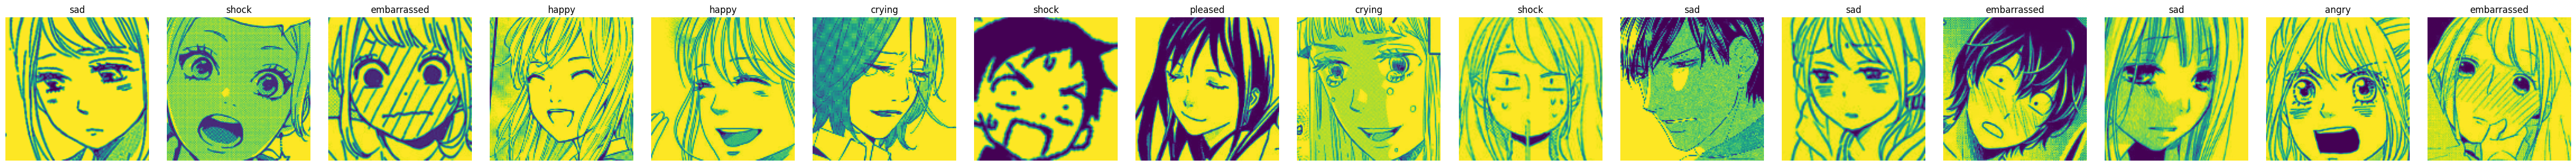

In [ ]:
plot_samples(X_train, y_train, list(range(5, 21)), classes)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(128, 128, 1)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(7, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 515ms/step - accuracy: 0.1624 - loss: 5.6402
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 329ms/step - accuracy: 0.1728 - loss: 1.9848
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 523ms/step - accuracy: 0.2826 - loss: 1.8225
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - accuracy: 0.2195 - loss: 1.9014
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 486ms/step - accuracy: 0.3491 - loss: 1.7298


In [ ]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        11
           4       0.50      0.08      0.13        13
           5       0.21      0.88      0.34        17
           6       0.41      0.35      0.38        20

    accuracy                           0.25        91
   macro avg       0.16      0.19      0.12        91
weighted avg       0.20      0.25      0.17        91



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Результат вышел **паршивый**. Связано это с очень малым количеством материала для обучения.

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(128,128, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(7, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 86s 7s/step - accuracy: 0.1520 - loss: 5.6623
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.1739 - loss: 1.9448
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.2433 - loss: 1.9094
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 138s 6s/step - accuracy: 0.2547 - loss: 1.8687
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - accuracy: 0.3770 - loss: 1.7062
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 7s/step - accuracy: 0.4552 - loss: 1.5396
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.5788 - loss: 1.1750
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 7s/step - accuracy: 0.6835 - loss: 0.8970
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 85s 7s/step - accuracy: 0.8291 - loss: 0.5634
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.8833 - loss: 0.4165


In [ ]:
cnn.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.2287 - loss: 3.6471


[3.7703428268432617, 0.23076923191547394]

### Результаты CNN оказались ничуть не лучше 😭

In [ ]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.25      0.36      0.30        11
           2       0.00      0.00      0.00        11
           3       0.18      0.18      0.18        11
           4       0.25      0.46      0.32        13
           5       0.14      0.18      0.15        17
           6       0.60      0.30      0.40        20

    accuracy                           0.23        91
   macro avg       0.20      0.21      0.19        91
weighted avg       0.25      0.23      0.22        91





---



# Работа с улучшенной версией dataset'а

In [ ]:
path = kagglehub.dataset_download("davidgamalielarcos/manga-faces-dataset")
path = path + "/Manga-Faces-dataset"
print(path)

/root/.cache/kagglehub/datasets/davidgamalielarcos/manga-faces-dataset/versions/1/Manga-Faces-dataset


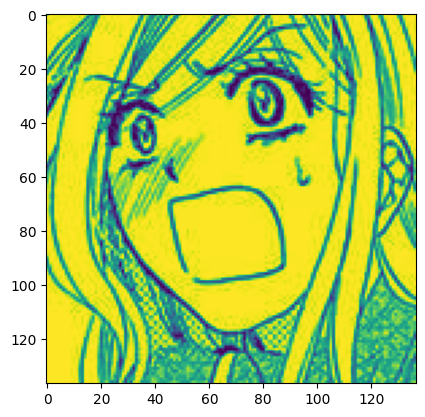

In [ ]:
first_image_path = os.path.join(path, "angry", "022_914_584_148_148.png")
img = cv2.imread(first_image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
plt.show()

In [ ]:
images = []
labels = []


for face_expression_image in os.listdir(path):
    face_expression_folder = os.path.join(path, face_expression_image)
    if os.path.isdir(face_expression_folder):
        for img_file in os.listdir(face_expression_folder):
            if img_file.endswith(".jpg") or img_file.endswith(".png") or img_file.endswith(".jfif"):
                img_path = os.path.join(face_expression_folder, img_file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (128, 128))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                images.append(img)
                labels.append(face_expression_image)

images_array = np.array(images)
labels_array = np.array(labels)

In [ ]:
images_array.shape

(670, 128, 128)

In [ ]:
labels_array.shape

(670,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images_array, labels_array, test_size=0.2, random_state=42, stratify=labels_array)

In [ ]:
classes = ['angry', 'blushed', 'confused', 'crying', 'embarrassed', 'happy', 'normal', 'pleased', 'pout', 'sad', 'shock']

In [ ]:
y_train = [classes.index(label) for label in y_train]
y_test = [classes.index(label) for label in y_test]

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(128,128, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(11, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 125s 7s/step - accuracy: 0.1318 - loss: 5.1434
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 134s 7s/step - accuracy: 0.2003 - loss: 2.1955
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.3863 - loss: 1.8769
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.5310 - loss: 1.4812
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.6647 - loss: 0.9889
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 143s 7s/step - accuracy: 0.8274 - loss: 0.6374
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.9444 - loss: 0.2398
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.9542 - loss: 0.2485
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.9566 - loss: 0.2286
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 143s 7s/step - accuracy: 0.9847 - loss: 0.1166


In [ ]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        13
           4       0.40      0.14      0.21        14
           5       0.21      0.83      0.33        24
           6       0.22      0.39      0.28        18
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00        21

    accuracy                           0.22       134
   macro avg       0.07      0.12      0.07       134
weighted avg       0.11      0.22      0.12       134



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Судя по результатам наша модель переобучена

In [ ]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step


In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)

Text(95.72222222222221, 0.5, 'Truth')

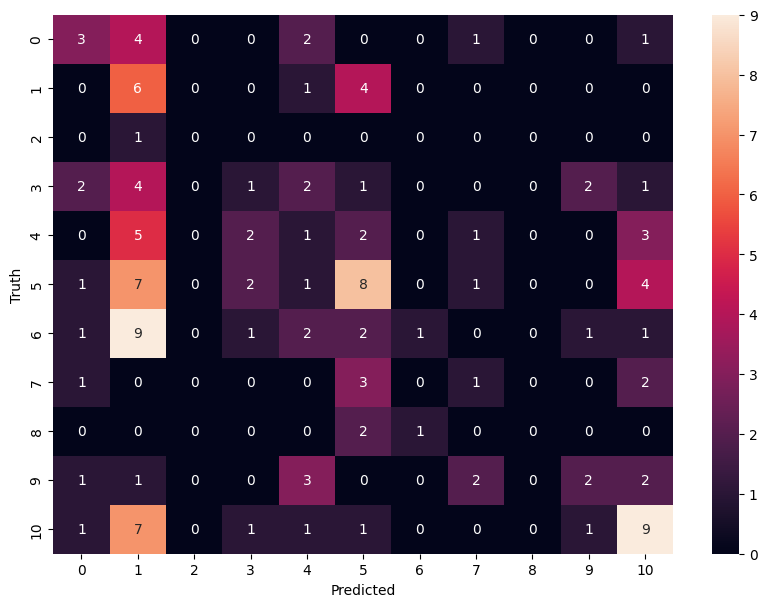

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Эмоции предсказанные нейронкой;

In [ ]:
def correct_incorrect_img(X, y_true, y_pred, indices, classes): #Функция для создания рамки вокруг картинок и установления цвета, в зависимости от правильности
    num_samples = len(indices)
    fig, axes = plt.subplots(1, num_samples, figsize=(num_samples * 3, 3))
    for i, ax in enumerate(axes):
        idx = indices[i]
        ax.imshow(X[idx])
        ax.set_title(classes[y_pred[idx]])
        ax.axis('on')

        color = 'red' if y_true[idx] != y_pred[idx] else 'green'
        for spine in ax.spines.values():
            spine.set_edgecolor(color)
            spine.set_linewidth(6)

    plt.tight_layout()
    plt.show()


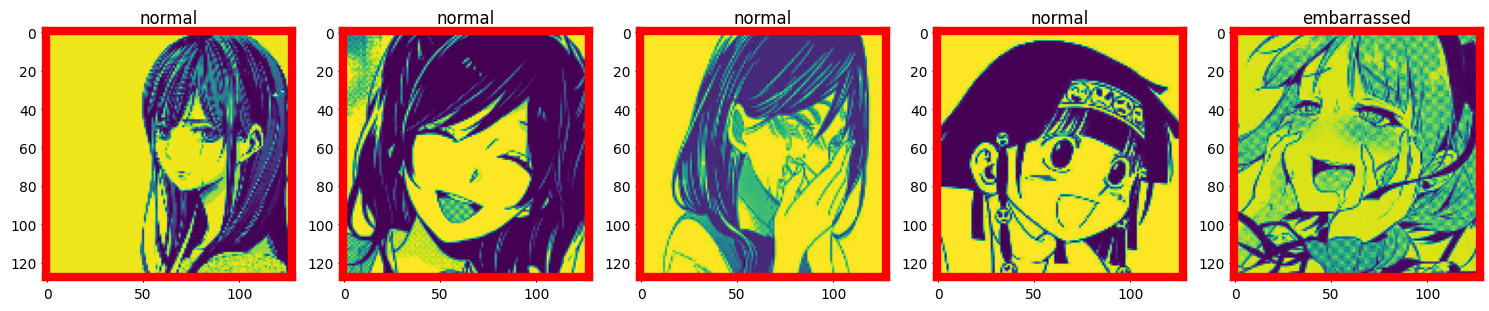

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
correct_incorrect_img(X_test, y_test, y_classes, list(range(0,5)), classes)
#Вывод изображений и класссов которые спрогнозировала нейронка

Правильные эмоции;

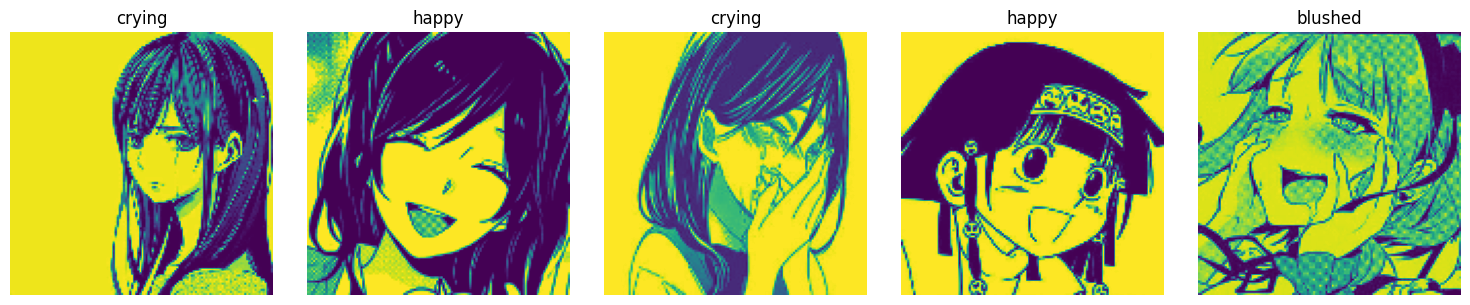

In [ ]:
plot_samples(X_test, y_test, list(range(0,5)), classes)
#Вывод правильных классов и изображений

## Столь плохой результат связан с плохим качеством материала и маленьким количеством материала для обучения.